In [ ]:
pip install matplotlib

In [1]:
import pandas as pd
import os
import pandas as pd
#import sqlalchemy
import numpy as np

from utils import *
import matplotlib.pyplot as plot

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
pd.options.plotting.backend = "plotly"

In [2]:
DA=pd.read_excel("../Datos/04_datos/Datos_DA.xlsx")
DA["Region"]=DA["Region"].replace(to_replace={"METROPOLITABA":"METROPOLITANA"})

In [3]:
logic=DA["Cuotas"]>0
DA=DA.loc[logic] #Se trabaja con 291 comunas
sorted(DA["Cuotas"].unique())

[1, 2, 3, 4, 5, 6, 7, 10, 2003, 2406, 2469, 2540, 3552, 3643]

# % Predios exentos

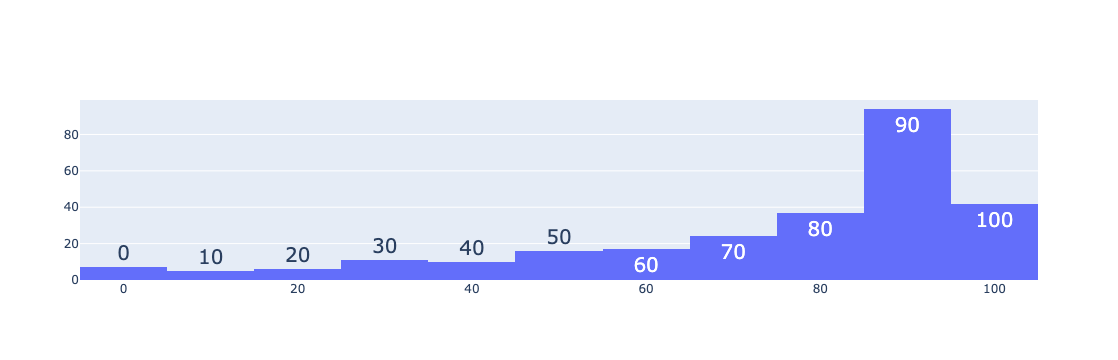

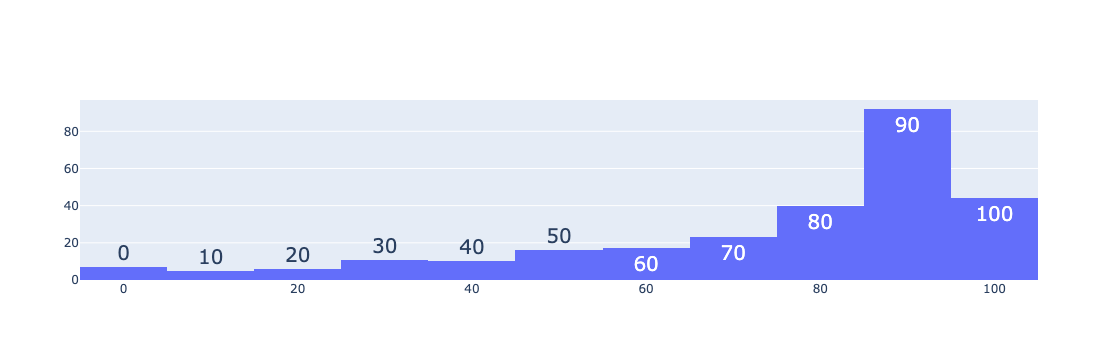

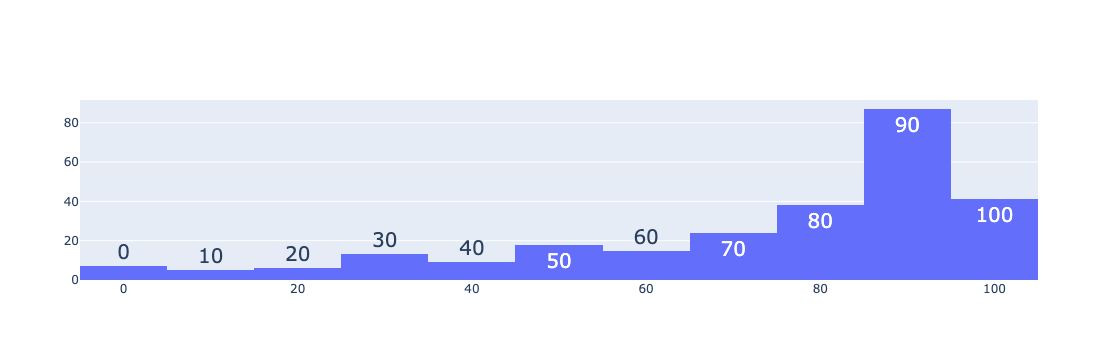

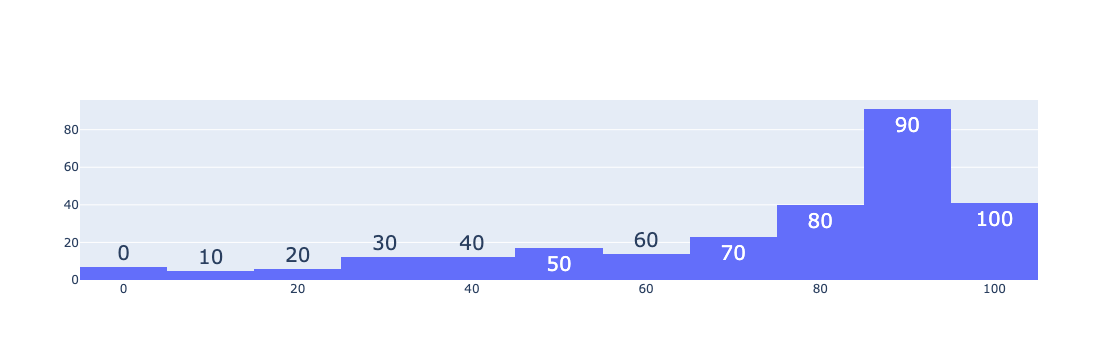

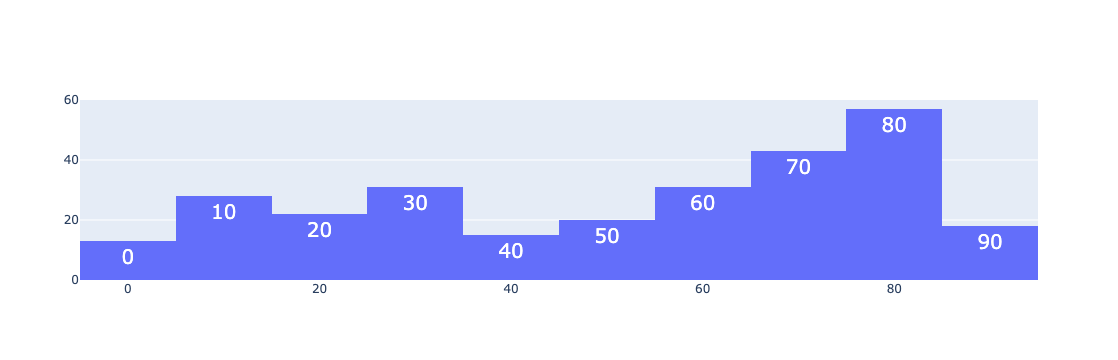

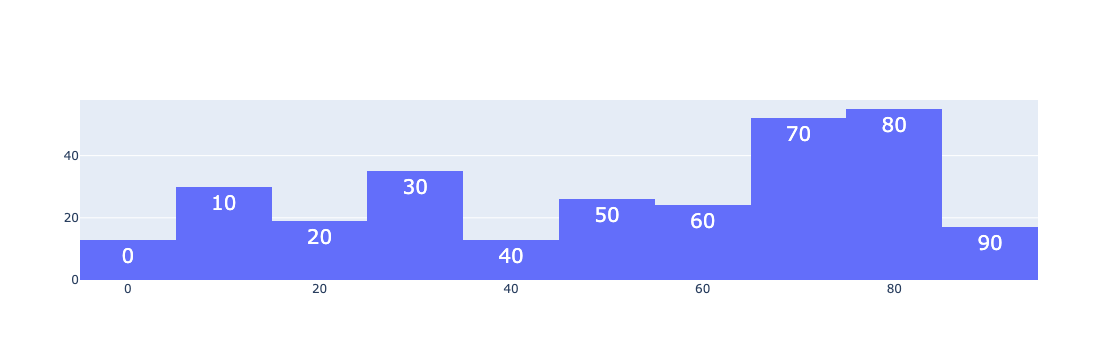

In [27]:
años = DA["Año"].unique()
for año in años:
    df= DA[DA["Año"]==año]
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df["% Exentos"], name="count", texttemplate="%{x}", textfont_size=20))

    fig.show()

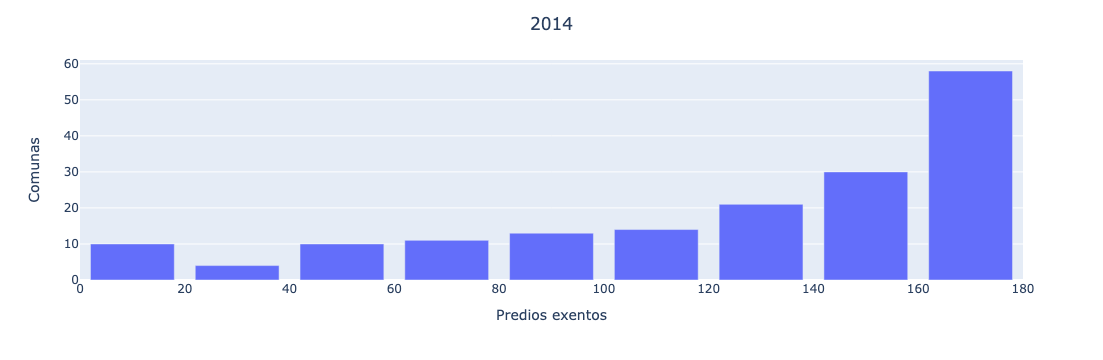

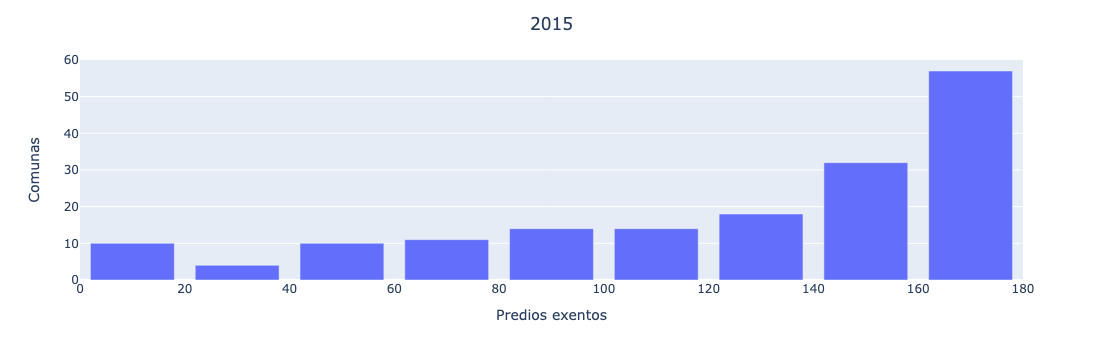

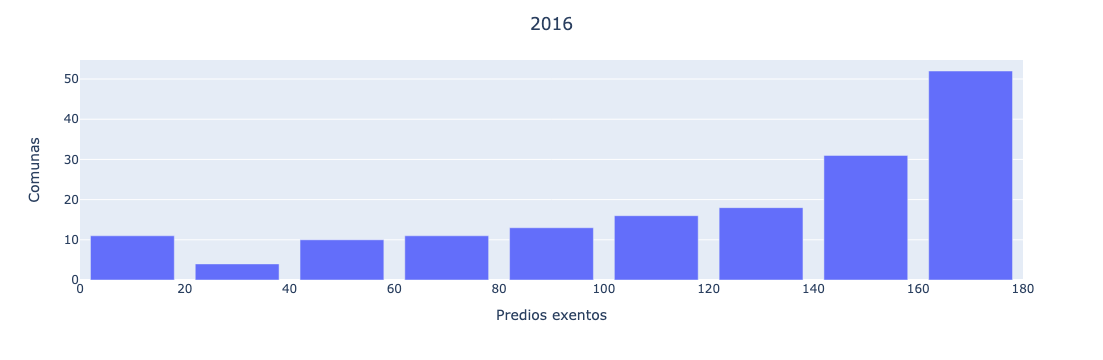

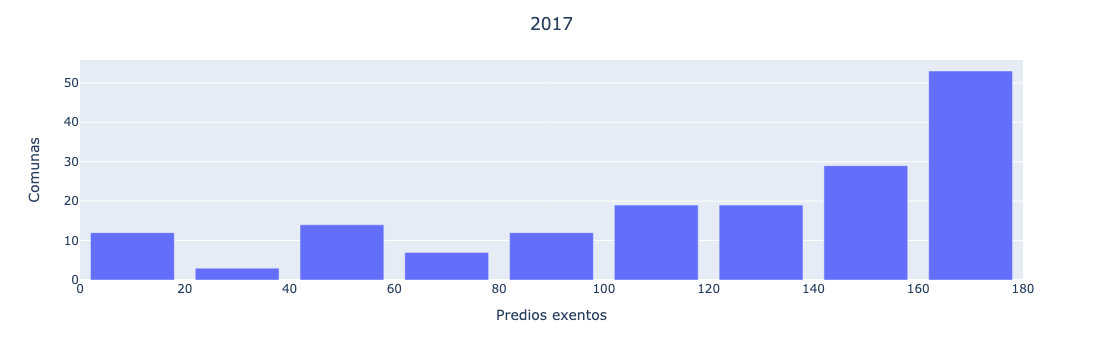

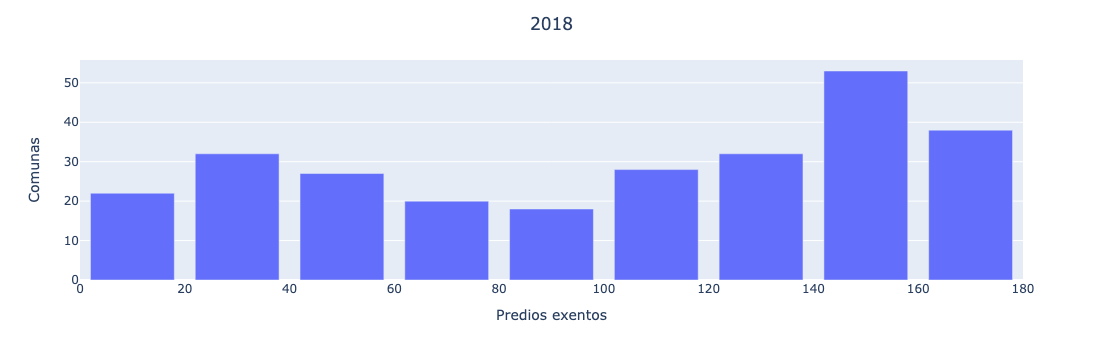

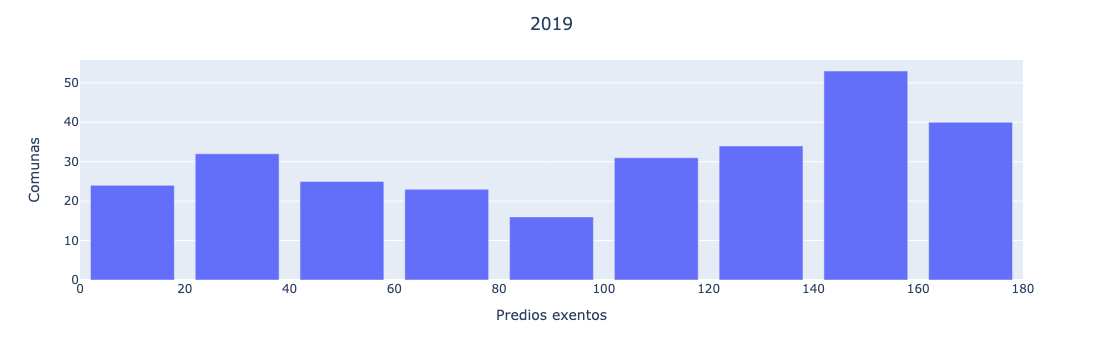

In [26]:
años = DA["Año"].unique()
for año in años:
    df= DA[DA["Año"]==año]
    counts, bins = np.histogram(df["% Exentos"], bins=range(0,100,10))
    bins = 1  *  ( bins [: - 1 ]  +  bins [ 1 :])
    fig = px.bar(x=bins, y=counts, labels={'x':'Predios exentos', 'y':'Comunas'})
    fig.update_layout(title=dict(text=f"{año}", x=0.5,xanchor="center"))
    fig.show()
  

In [ ]:
  counts, bins = np.histogram(df["% Exentos"], bins=[0,10,20,30,40,50,60,70,80,90,100])
    bins = 0.5 * (bins[:-1] + bins[1:])
    fig = px.bar(x=bins, y=counts, labels={'x':'Predios exentos', 'y':'Comunas'})
    fig.update_layout(title=dict(text=f"{año}", x=0.5,xanchor="center"))
    fig.show()

# Promedio exentos por región

In [ ]:
regions = DA["Region"].unique()
target = "% Exentos"
df_group=DA.groupby(["Region","Comuna"]).mean().round(1)
for region in regions: 
    fig = make_subplots(rows=1, cols=1, shared_yaxes=True)
    fig.add_trace(go.Bar(name="{da}",
                        x=df_group.loc[(region)].reset_index()["Comuna"],
                         y=df_group.loc[(region)].reset_index()[target],
                         text=df_group.loc[(region)].reset_index()[target],
                         textposition="outside",
                         texttemplate="%{y}%"),
                 row=1, col=1)
    fig.update_layout(title=dict(text=f"{region}", x=0.5, xanchor="center"),
                     height=500)
    fig.show()